# Part 1: Find Images of Chickens

In [1]:
import pyarrow as pa

In [2]:
hdfs = pa.hdfs.HadoopFileSystem(host="10.3.0.2", port=8020)

In [3]:
hdfs.ls('/user/swapanc1')

['/user/swapanc1/.Trash',
 '/user/swapanc1/.sparkStaging',
 '/user/swapanc1/homework1_images',
 '/user/swapanc1/homework3',
 '/user/swapanc1/homework3_image']

In [4]:
# import the jupyter notebook importer
import import_ipynb
from data603 import SparkLauncher
from data603 import HDFSLauncher

conf = SparkLauncher.get_spark_conf()
spark = SparkLauncher.get_spark_session(conf, pack_venv = True)
hdfs = HDFSLauncher.get_hdfs()

importing Jupyter notebook from /scratch/data603_sp2022/swapanc1/data603/SparkLauncher.ipynb
importing Jupyter notebook from /scratch/data603_sp2022/swapanc1/data603/HDFSLauncher.ipynb
Packing Virtual Environment: /scratch/data603_admin/venv into swapanc1.tar.gz
Creating Spark Session: swapanc1_data603_spark_20220330_103209


In [5]:
class_description=spark.read.csv('/data/google_open_image/metadata/class-descriptions-boxable.csv')

In [6]:
class_description.show(5)

+-----------+----------+
|        _c0|       _c1|
+-----------+----------+
|  /m/011k07|  Tortoise|
|/m/011q46kg| Container|
|  /m/012074|    Magpie|
|  /m/0120dh|Sea turtle|
|  /m/01226z|  Football|
+-----------+----------+
only showing top 5 rows



In [7]:
C_description=class_description.withColumnRenamed("_c0","LabelName").withColumnRenamed("_c1","Description")
C_description.show(5)

+-----------+-----------+
|  LabelName|Description|
+-----------+-----------+
|  /m/011k07|   Tortoise|
|/m/011q46kg|  Container|
|  /m/012074|     Magpie|
|  /m/0120dh| Sea turtle|
|  /m/01226z|   Football|
+-----------+-----------+
only showing top 5 rows



## Converting to Pandas

In [8]:
class_df=C_description.toPandas()

In [9]:
class_df.head(3)

LabelName Description
0    /m/011k07    Tortoise
1  /m/011q46kg   Container
2    /m/012074      Magpie

## Loading the Labels Files

In [10]:
labels1=spark.read.csv('/data/google_open_image/labels/test-annotations-human-imagelabels-boxable.csv',header = True)
labels2=spark.read.csv('/data/google_open_image/labels/train-annotations-human-imagelabels-boxable.csv',header = True)
labels3=spark.read.csv('/data/google_open_image/labels/validation-annotations-human-imagelabels-boxable.csv',header = True)

In [11]:
labels1.show(4)

+----------------+------------+---------+----------+
|         ImageID|      Source|LabelName|Confidence|
+----------------+------------+---------+----------+
|000026e7ee790996|verification| /m/0cgh4|         0|
|000026e7ee790996|verification|/m/04hgtk|         0|
|000026e7ee790996|verification| /m/0d5gx|         0|
|000026e7ee790996|verification| /m/07j7r|         1|
+----------------+------------+---------+----------+
only showing top 4 rows



In [12]:
labels2.show(4)

+----------------+------------+---------+----------+
|         ImageID|      Source|LabelName|Confidence|
+----------------+------------+---------+----------+
|000002b66c9c498e|verification|/m/014j1m|         0|
|000002b66c9c498e|verification|/m/014sv8|         1|
|000002b66c9c498e|verification| /m/01599|         0|
|000002b66c9c498e|verification| /m/015p6|         0|
+----------------+------------+---------+----------+
only showing top 4 rows



In [13]:
labels3.show(4)

+----------------+------------+---------+----------+
|         ImageID|      Source|LabelName|Confidence|
+----------------+------------+---------+----------+
|0001eeaf4aed83f9|verification| /m/0cmf2|         1|
|0004886b7d043cfd|verification|/m/01g317|         0|
|0004886b7d043cfd|verification|/m/04hgtk|         0|
|0004886b7d043cfd|verification| /m/09j2d|         0|
+----------------+------------+---------+----------+
only showing top 4 rows



## Joining the 3 labels into single DataFrame

In [14]:
labels_final=labels1.union(labels2).union(labels3)

In [15]:
labels_final.show(4)

+----------------+------------+---------+----------+
|         ImageID|      Source|LabelName|Confidence|
+----------------+------------+---------+----------+
|000026e7ee790996|verification| /m/0cgh4|         0|
|000026e7ee790996|verification|/m/04hgtk|         0|
|000026e7ee790996|verification| /m/0d5gx|         0|
|000026e7ee790996|verification| /m/07j7r|         1|
+----------------+------------+---------+----------+
only showing top 4 rows



## Loading the 3rd file into DataFrame

In [16]:
test_avro = spark.read\
              .format("com.databricks.spark.avro")\
              .load('/etl/google_open_image/images/test.avro')

In [17]:
test_avro.show(4)

+----------------+----------+------+--------------------+
|              id|    subset|format|                data|
+----------------+----------+------+--------------------+
|2B13330E9197AFA9|VALIDATION|   JPG|[FF D8 FF E0 00 1...|
|F3276B944BBB9874|VALIDATION|   JPG|[FF D8 FF E0 00 1...|
|B49844CAF0ECC14C|VALIDATION|   JPG|[FF D8 FF E0 00 1...|
|6E8B9AE2E27665D4|VALIDATION|   JPG|[FF D8 FF E0 00 1...|
+----------------+----------+------+--------------------+
only showing top 4 rows



## Finding the ImageId's containing 'Chicken' from the first 2 DataFrames

In [18]:
class_df_chicken = class_df[class_df["Description"]=='Chicken']
class_df_chicken.head()

LabelName Description
421  /m/09b5t     Chicken

In [19]:
labels_chicken = labels_final[labels_final["LabelName"]=='/m/09b5t']
labels_chicken.show(25)

+----------------+------------+---------+----------+
|         ImageID|      Source|LabelName|Confidence|
+----------------+------------+---------+----------+
|000411001ff7dd4f|verification| /m/09b5t|         1|
|039dfd67a8e053b8|verification| /m/09b5t|         1|
|03bc7fbc956b3a9a|verification| /m/09b5t|         1|
|04423d3f6f5b8e74|verification| /m/09b5t|         1|
|05600e8a393e3c3a|verification| /m/09b5t|         1|
|0650a130d7f707b5|verification| /m/09b5t|         1|
|066f4e7245ffecad|verification| /m/09b5t|         1|
|07621394c8ad0b47|verification| /m/09b5t|         1|
|0913fbf6fa5c190e|verification| /m/09b5t|         1|
|0a8a5aa471796fd5|verification| /m/09b5t|         1|
|0cc4722ca906f86c|verification| /m/09b5t|         1|
|0e5ecc56e464dcb8|verification| /m/09b5t|         1|
|0e9be8b09f71f909|verification| /m/09b5t|         1|
|0ee696888a405d3b|verification| /m/09b5t|         0|
|0f8a38312499d209|verification| /m/09b5t|         1|
|113203fb20cd17da|verification| /m/09b5t|     

In [20]:
merged= labels_chicken.join(C_description, on = 'LabelName', how = 'left')

In [21]:
merged.show(4)

+---------+----------------+------------+----------+-----------+
|LabelName|         ImageID|      Source|Confidence|Description|
+---------+----------------+------------+----------+-----------+
| /m/09b5t|000411001ff7dd4f|verification|         1|    Chicken|
| /m/09b5t|039dfd67a8e053b8|verification|         1|    Chicken|
| /m/09b5t|03bc7fbc956b3a9a|verification|         1|    Chicken|
| /m/09b5t|04423d3f6f5b8e74|verification|         1|    Chicken|
+---------+----------------+------------+----------+-----------+
only showing top 4 rows



## Converting the merged DataFrame to Pandas 

In [22]:
merged_df=merged.toPandas()

In [23]:
merged_df.shape

(2133, 5)

## Finding the Chicken from Avro file by joining the Avro file with the merged Dataframe

In [24]:
test_avro.show(4)

+----------------+----------+------+--------------------+
|              id|    subset|format|                data|
+----------------+----------+------+--------------------+
|2B13330E9197AFA9|VALIDATION|   JPG|[FF D8 FF E0 00 1...|
|F3276B944BBB9874|VALIDATION|   JPG|[FF D8 FF E0 00 1...|
|B49844CAF0ECC14C|VALIDATION|   JPG|[FF D8 FF E0 00 1...|
|6E8B9AE2E27665D4|VALIDATION|   JPG|[FF D8 FF E0 00 1...|
+----------------+----------+------+--------------------+
only showing top 4 rows



## We have a common Image Id but Avro file contains UpperCase Values. So coverting to Lowercase values to join both Dataframes. 

In [25]:
import pyspark.sql.functions as func
test_avro_lowercase = test_avro.withColumn('id', func.lower(func.col("id")))

In [26]:
test_avro_lowercase.show(4)

+----------------+----------+------+--------------------+
|              id|    subset|format|                data|
+----------------+----------+------+--------------------+
|2b13330e9197afa9|VALIDATION|   JPG|[FF D8 FF E0 00 1...|
|f3276b944bbb9874|VALIDATION|   JPG|[FF D8 FF E0 00 1...|
|b49844caf0ecc14c|VALIDATION|   JPG|[FF D8 FF E0 00 1...|
|6e8b9ae2e27665d4|VALIDATION|   JPG|[FF D8 FF E0 00 1...|
+----------------+----------+------+--------------------+
only showing top 4 rows



## Converting the new avro file to Pandas Dataframe

In [27]:
test_df_lowercase=test_avro_lowercase.limit(200).toPandas()

In [28]:
test_df_lowercase.head(4)

id      subset format  \
0  2b13330e9197afa9  VALIDATION    JPG   
1  f3276b944bbb9874  VALIDATION    JPG   
2  b49844caf0ecc14c  VALIDATION    JPG   
3  6e8b9ae2e27665d4  VALIDATION    JPG   

                                                data  
0  [255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0,...  
1  [255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0,...  
2  [255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0,...  
3  [255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0,...

## Now Joining the avro file with the merged Dataframe

In [29]:
final = merged.filter(merged["LabelName"].contains("/m/09b5t"))\
                        .join(test_avro_lowercase, 
                              merged.ImageID == test_avro_lowercase.id)

In [30]:
final.show(4)

+---------+----------------+------------+----------+-----------+----------------+----------+------+--------------------+
|LabelName|         ImageID|      Source|Confidence|Description|              id|    subset|format|                data|
+---------+----------------+------------+----------+-----------+----------------+----------+------+--------------------+
| /m/09b5t|0650a130d7f707b5|verification|         1|    Chicken|0650a130d7f707b5|VALIDATION|   JPG|[FF D8 FF E0 00 1...|
| /m/09b5t|e21b4fdbfb556c97|verification|         1|    Chicken|e21b4fdbfb556c97|VALIDATION|   JPG|[FF D8 FF E0 00 1...|
| /m/09b5t|54281d353cad6bb5|verification|         0|    Chicken|54281d353cad6bb5|VALIDATION|   JPG|[FF D8 FF E0 00 1...|
| /m/09b5t|d2dd123c9c193f9b|verification|         1|    Chicken|d2dd123c9c193f9b|VALIDATION|   JPG|[FF D8 FF E0 00 1...|
+---------+----------------+------------+----------+-----------+----------------+----------+------+--------------------+
only showing top 4 rows



## Converting the Final Dataframe to Pandas

In [31]:
final_pd=final.toPandas()

In [32]:
final_pd.head(4)

LabelName           ImageID        Source Confidence Description  \
0  /m/09b5t  0650a130d7f707b5  verification          1     Chicken   
1  /m/09b5t  e21b4fdbfb556c97  verification          1     Chicken   
2  /m/09b5t  54281d353cad6bb5  verification          0     Chicken   
3  /m/09b5t  d2dd123c9c193f9b  verification          1     Chicken   

                 id      subset format  \
0  0650a130d7f707b5  VALIDATION    JPG   
1  e21b4fdbfb556c97  VALIDATION    JPG   
2  54281d353cad6bb5  VALIDATION    JPG   
3  d2dd123c9c193f9b  VALIDATION    JPG   

                                                data  
0  [255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0,...  
1  [255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0,...  
2  [255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0,...  
3  [255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0,...

In [33]:
final_pd.shape

(219, 9)

In [34]:
print("Number of Chicken Images are:",len(final_pd))

Number of Chicken Images are: 219


## To Display a Random Chicken

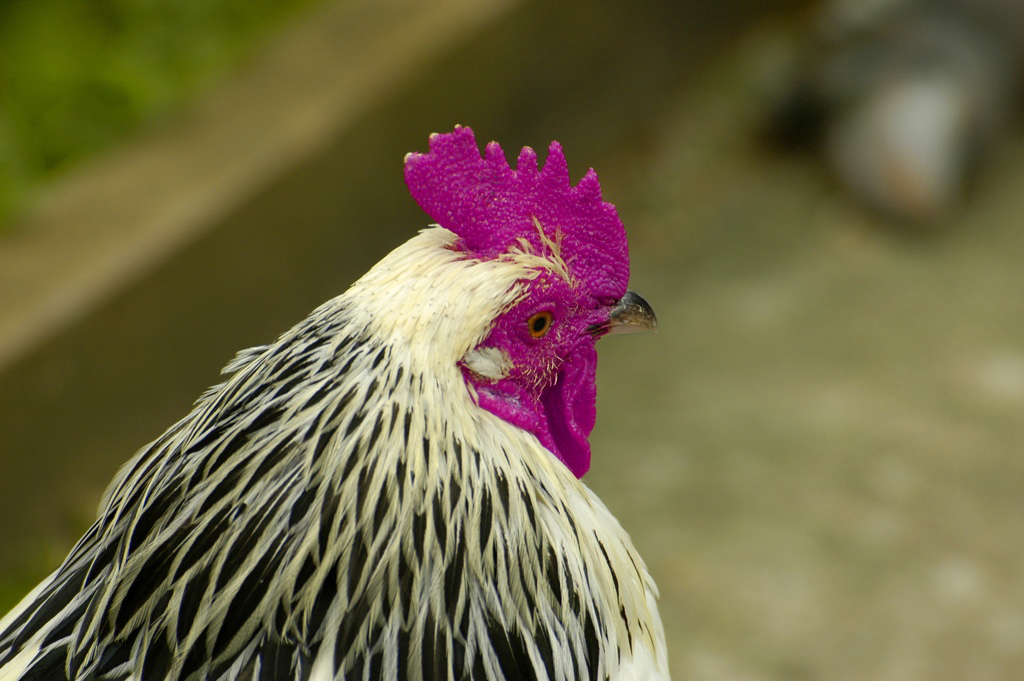

In [35]:
from PIL import Image
import io
picture = Image.open(io.BytesIO(final_pd.data[109]))
picture

## Creating a New Directory for Homework3

In [36]:
!hdfs dfs -mkdir /user/swapanc1/homework3

mkdir: `/user/swapanc1/homework3': File exists


## Saving the dataframe in AVRO format to your HDFS user directory

In [37]:
#final.write.format("avro").save("/user/swapanc1/homework3/homework3_part1.avro")

## Checking the saved AVRO File

In [38]:
hdfs.ls('/user/swapanc1')

['/user/swapanc1/.Trash',
 '/user/swapanc1/.sparkStaging',
 '/user/swapanc1/homework1_images',
 '/user/swapanc1/homework3',
 '/user/swapanc1/homework3_image']

In [39]:
hdfs.ls('/user/swapanc1/homework3/')

['/user/swapanc1/homework3/homework3_images',
 '/user/swapanc1/homework3/homework3_part1.avro']

# Part 2 Finding Friendly Chickens

## Reading the bounding box data from hdfs into a dataframe

In [40]:
bounding_box1=spark.read.csv('/data/google_open_image/bboxes/test-annotations-bbox.csv',header = True)
bounding_box2=spark.read.csv('/data/google_open_image/bboxes/train-annotations-bbox.csv',header = True)
bounding_box3=spark.read.csv('/data/google_open_image/bboxes/validation-annotations-bbox.csv',header = True)

In [41]:
bounding_box1.show(4)

+----------------+------+---------+----------+----------+---------+----------+----------+----------+-----------+---------+-----------+--------+
|         ImageID|Source|LabelName|Confidence|      XMin|     XMax|      YMin|      YMax|IsOccluded|IsTruncated|IsGroupOf|IsDepiction|IsInside|
+----------------+------+---------+----------+----------+---------+----------+----------+----------+-----------+---------+-----------+--------+
|000026e7ee790996|xclick| /m/07j7r|         1|  0.071875|0.1453125|   0.20625|0.39166668|         0|          1|        1|          0|       0|
|000026e7ee790996|xclick| /m/07j7r|         1| 0.4390625| 0.571875|0.26458332|0.43541667|         0|          1|        1|          0|       0|
|000026e7ee790996|xclick| /m/07j7r|         1|   0.66875|        1|         0| 0.5520833|         0|          1|        1|          0|       0|
|000062a39995e348|xclick| /m/015p6|         1|0.20620842| 0.849224|0.15463917|         1|         0|          0|        0|          0|  

In [42]:
bounding_box2.show(4)

+----------------+------+---------+----------+--------+--------+--------+--------+----------+-----------+---------+-----------+--------+
|         ImageID|Source|LabelName|Confidence|    XMin|    XMax|    YMin|    YMax|IsOccluded|IsTruncated|IsGroupOf|IsDepiction|IsInside|
+----------------+------+---------+----------+--------+--------+--------+--------+----------+-----------+---------+-----------+--------+
|000002b66c9c498e|xclick|/m/01g317|         1|0.012500|0.195312|0.148438|0.587500|         0|          1|        0|          0|       0|
|000002b66c9c498e|xclick|/m/01g317|         1|0.025000|0.276563|0.714063|0.948438|         0|          1|        0|          0|       0|
|000002b66c9c498e|xclick|/m/01g317|         1|0.151562|0.310937|0.198437|0.590625|         1|          0|        0|          0|       0|
|000002b66c9c498e|xclick|/m/01g317|         1|0.256250|0.429688|0.651563|0.925000|         1|          0|        0|          0|       0|
+----------------+------+---------+------

In [43]:
bounding_box3.show(4)

+----------------+------+---------+----------+-----------+---------+----------+----------+----------+-----------+---------+-----------+--------+
|         ImageID|Source|LabelName|Confidence|       XMin|     XMax|      YMin|      YMax|IsOccluded|IsTruncated|IsGroupOf|IsDepiction|IsInside|
+----------------+------+---------+----------+-----------+---------+----------+----------+----------+-----------+---------+-----------+--------+
|0001eeaf4aed83f9|xclick| /m/0cmf2|         1|0.022673031|0.9642005|0.07103825|0.80054647|         0|          0|        0|          0|       0|
|000595fe6fee6369|xclick| /m/02wbm|         1|          0|        1|         0|         1|         0|          0|        1|          0|       0|
|000595fe6fee6369|xclick| /m/02xwb|         1|  0.1413844| 0.179676|0.67627496|0.73170733|         0|          0|        0|          0|       0|
|000595fe6fee6369|xclick| /m/02xwb|         1| 0.21354933|0.2533137|0.29933482|0.35476717|         1|          0|        0|       

## Joining the Bounding Box files into single Dataframe

In [44]:
bb_union=bounding_box1.union(bounding_box2).union(bounding_box3)

In [45]:
bb_union.show(4)

+----------------+------+---------+----------+----------+---------+----------+----------+----------+-----------+---------+-----------+--------+
|         ImageID|Source|LabelName|Confidence|      XMin|     XMax|      YMin|      YMax|IsOccluded|IsTruncated|IsGroupOf|IsDepiction|IsInside|
+----------------+------+---------+----------+----------+---------+----------+----------+----------+-----------+---------+-----------+--------+
|000026e7ee790996|xclick| /m/07j7r|         1|  0.071875|0.1453125|   0.20625|0.39166668|         0|          1|        1|          0|       0|
|000026e7ee790996|xclick| /m/07j7r|         1| 0.4390625| 0.571875|0.26458332|0.43541667|         0|          1|        1|          0|       0|
|000026e7ee790996|xclick| /m/07j7r|         1|   0.66875|        1|         0| 0.5520833|         0|          1|        1|          0|       0|
|000062a39995e348|xclick| /m/015p6|         1|0.20620842| 0.849224|0.15463917|         1|         0|          0|        0|          0|  

In [46]:
bb_union.printSchema()

root
 |-- ImageID: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- LabelName: string (nullable = true)
 |-- Confidence: string (nullable = true)
 |-- XMin: string (nullable = true)
 |-- XMax: string (nullable = true)
 |-- YMin: string (nullable = true)
 |-- YMax: string (nullable = true)
 |-- IsOccluded: string (nullable = true)
 |-- IsTruncated: string (nullable = true)
 |-- IsGroupOf: string (nullable = true)
 |-- IsDepiction: string (nullable = true)
 |-- IsInside: string (nullable = true)



## Converting the String Datatypes for coordinate values to Double Datatype

In [47]:
from pyspark.sql.types import DoubleType
bb_union = bb_union.withColumn("XMin", bb_union['XMin'].cast(DoubleType()))
bb_union = bb_union.withColumn("XMax", bb_union['XMax'].cast(DoubleType()))
bb_union = bb_union.withColumn("YMin", bb_union['YMin'].cast(DoubleType()))
bb_union = bb_union.withColumn("YMax", bb_union['YMax'].cast(DoubleType()))
bb_union = bb_union.withColumn("Confidence", bb_union['Confidence'].cast(DoubleType()))

In [48]:
bb_union.printSchema() ## to check if converted

root
 |-- ImageID: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- LabelName: string (nullable = true)
 |-- Confidence: double (nullable = true)
 |-- XMin: double (nullable = true)
 |-- XMax: double (nullable = true)
 |-- YMin: double (nullable = true)
 |-- YMax: double (nullable = true)
 |-- IsOccluded: string (nullable = true)
 |-- IsTruncated: string (nullable = true)
 |-- IsGroupOf: string (nullable = true)
 |-- IsDepiction: string (nullable = true)
 |-- IsInside: string (nullable = true)



## Reading the previously saved AVRO file

In [49]:
avro_file = spark.read\
              .format("avro")\
              .load('/user/swapanc1/homework3/homework3_part1.avro')

In [50]:
avro_file.show(4)

+---------+----------------+------------+----------+-----------+----------------+----------+------+--------------------+
|LabelName|         ImageID|      Source|Confidence|Description|              id|    subset|format|                data|
+---------+----------------+------------+----------+-----------+----------------+----------+------+--------------------+
| /m/09b5t|880329a1ceee2f45|verification|         0|    Chicken|880329a1ceee2f45|VALIDATION|   JPG|[FF D8 FF E0 00 1...|
| /m/09b5t|b56f23e6803f4abb|verification|         0|    Chicken|b56f23e6803f4abb|VALIDATION|   JPG|[FF D8 FF E0 00 1...|
| /m/09b5t|b91447474b1863a9|verification|         1|    Chicken|b91447474b1863a9|VALIDATION|   JPG|[FF D8 FF E0 00 1...|
| /m/09b5t|eb421cb6136592be|verification|         0|    Chicken|eb421cb6136592be|VALIDATION|   JPG|[FF D8 FF E0 00 1...|
+---------+----------------+------------+----------+-----------+----------------+----------+------+--------------------+
only showing top 4 rows



In [51]:
avro_file_pd=avro_file.toPandas()

## Filtering the LabelName containing chicken from the Bounding boxes Dataframe

In [52]:
filtered = bb_union.filter(bb_union["LabelName"].contains("/m/09b5t"))

In [53]:
filtered.show(4)

+----------------+------+---------+----------+----------+----------+----------+---------+----------+-----------+---------+-----------+--------+
|         ImageID|Source|LabelName|Confidence|      XMin|      XMax|      YMin|     YMax|IsOccluded|IsTruncated|IsGroupOf|IsDepiction|IsInside|
+----------------+------+---------+----------+----------+----------+----------+---------+----------+-----------+---------+-----------+--------+
|000411001ff7dd4f|xclick| /m/09b5t|       1.0| 0.1734375|   0.46875|0.19791667|0.7916667|         0|          0|        1|          0|       0|
|000411001ff7dd4f|xclick| /m/09b5t|       1.0|      0.45| 0.6859375|0.26041666|0.5520833|         0|          0|        0|          0|       0|
|000411001ff7dd4f|xclick| /m/09b5t|       1.0| 0.9328125|       1.0|       0.4|0.6458333|         0|          1|        0|          0|       0|
|039dfd67a8e053b8|xclick| /m/09b5t|       1.0|0.21354167|0.23828125| 0.7218045|0.8095238|         1|          0|        0|          0|  

In [54]:
filtered_pd=filtered.toPandas()

## Now Joining the filtered Bounding Boxes dataframe with the saved AVRO file

In [55]:
#bb_avro_join=filtered.join(avro_file, filtered.ImageID == avro_file.ImageID)
bb_avro_join=filtered.join(avro_file, on='ImageID')

In [56]:
bb_avro_join.show(4)

+----------------+------+---------+----------+----------+----------+-----------+----------+----------+-----------+---------+-----------+--------+---------+------------+----------+-----------+----------------+----------+------+--------------------+
|         ImageID|Source|LabelName|Confidence|      XMin|      XMax|       YMin|      YMax|IsOccluded|IsTruncated|IsGroupOf|IsDepiction|IsInside|LabelName|      Source|Confidence|Description|              id|    subset|format|                data|
+----------------+------+---------+----------+----------+----------+-----------+----------+----------+-----------+---------+-----------+--------+---------+------------+----------+-----------+----------------+----------+------+--------------------+
|0650a130d7f707b5|xclick| /m/09b5t|       1.0|  0.021875|  0.278125| 0.20208333| 0.8208333|         0|          0|        0|          0|       0| /m/09b5t|verification|         1|    Chicken|0650a130d7f707b5|VALIDATION|   JPG|[FF D8 FF E0 00 1...|
|0650a13

In [57]:
bb_avro_join.printSchema()

root
 |-- ImageID: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- LabelName: string (nullable = true)
 |-- Confidence: double (nullable = true)
 |-- XMin: double (nullable = true)
 |-- XMax: double (nullable = true)
 |-- YMin: double (nullable = true)
 |-- YMax: double (nullable = true)
 |-- IsOccluded: string (nullable = true)
 |-- IsTruncated: string (nullable = true)
 |-- IsGroupOf: string (nullable = true)
 |-- IsDepiction: string (nullable = true)
 |-- IsInside: string (nullable = true)
 |-- LabelName: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- Confidence: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- id: string (nullable = true)
 |-- subset: string (nullable = true)
 |-- format: string (nullable = true)
 |-- data: binary (nullable = true)



In [58]:
bb_avro_pd_j=filtered_pd.merge(avro_file_pd, left_on='ImageID',right_on='ImageID')

In [59]:
bb_avro_pd_j.head()

ImageID Source_x LabelName_x  Confidence_x      XMin      XMax  \
0  000411001ff7dd4f   xclick    /m/09b5t           1.0  0.173437  0.468750   
1  000411001ff7dd4f   xclick    /m/09b5t           1.0  0.450000  0.685937   
2  000411001ff7dd4f   xclick    /m/09b5t           1.0  0.932813  1.000000   
3  039dfd67a8e053b8   xclick    /m/09b5t           1.0  0.213542  0.238281   
4  039dfd67a8e053b8   xclick    /m/09b5t           1.0  0.406250  0.446615   

       YMin      YMax IsOccluded IsTruncated  \
0  0.197917  0.791667          0           0   
1  0.260417  0.552083          0           0   
2  0.400000  0.645833          0           1   
3  0.721804  0.809524          1           0   
4  0.842105  0.934837          0           0   

                         ...                         IsDepiction IsInside  \
0                        ...                                   0        0   
1                        ...                                   0        0   
2                        ...                                   0        0   
3                        ...                                   0        0   
4                        ...                                   0        0   

  LabelName_y      Source_y Confidence_y Description                id  \
0    /m/09b5t  verification            1     Chicken  000411001ff7dd4f   
1    /m/09b5t  verification            1     Chicken  000411001ff7dd4f   
2    /m/09b5t  verification            1     Chicken  000411001ff7dd4f   
3    /m/09b5t  verification            1     Chicken  039dfd67a8e053b8   
4    /m/09b5t  verification            1     Chicken  039dfd67a8e053b8   

       subset format                                               data  
0  VALIDATION    JPG  [255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0,...  
1  VALIDATION    JPG  [255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0,...  
2  VALIDATION    JPG  [255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0,...  
3  VALIDATION    JPG  [255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0,...  
4  VALIDATION    JPG  [255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0,...  

[5 rows x 21 columns]

In [60]:
bb_avro_pd_j.shape

(240, 21)

In [66]:
friendly_chicken=bb_avro_pd_j.iloc[[1,8,120,48,88]] ## Checking for friendly chicken

In [67]:
friendly_chicken=friendly_chicken.reset_index(drop=True)
friendly_chicken.head(2)

ImageID Source_x LabelName_x  Confidence_x      XMin      XMax  \
0  000411001ff7dd4f   xclick    /m/09b5t           1.0  0.450000  0.685937   
1  0650a130d7f707b5   xclick    /m/09b5t           1.0  0.021875  0.278125   

       YMin      YMax IsOccluded IsTruncated  \
0  0.260417  0.552083          0           0   
1  0.202083  0.820833          0           0   

                         ...                         IsDepiction IsInside  \
0                        ...                                   0        0   
1                        ...                                   0        0   

  LabelName_y      Source_y Confidence_y Description                id  \
0    /m/09b5t  verification            1     Chicken  000411001ff7dd4f   
1    /m/09b5t  verification            1     Chicken  0650a130d7f707b5   

       subset format                                               data  
0  VALIDATION    JPG  [255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0,...  
1  VALIDATION    JPG  [255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0,...  

[2 rows x 21 columns]

## Setting Image Size

In [69]:
im = Image.open(io.BytesIO(friendly_chicken.data[1])) 
wid,heig=im.size
friendly_chicken.XMin*=wid
friendly_chicken.XMax*=wid
friendly_chicken.YMin*=heig
friendly_chicken.YMax*=heig

## User Defined Function to crop the Friendly Chicken Images

In [70]:
def cropped(data,left,top,right,bottom):
    pic_ = Image.open(io.BytesIO(data))
    cropped_pic = pic_.crop((left, top, right, bottom))
    cropped_pic.show()
    return cropped_pic

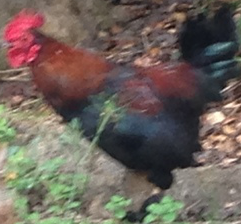

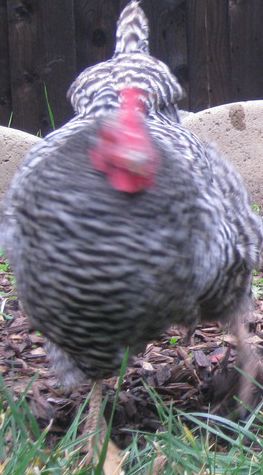

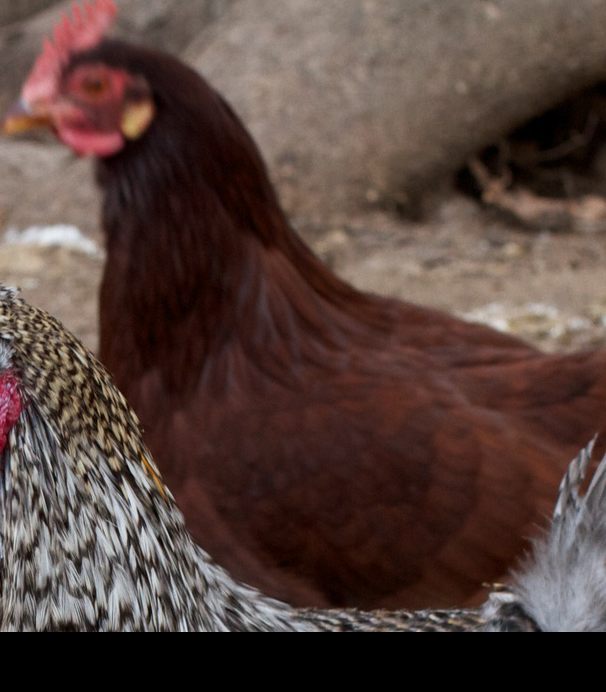

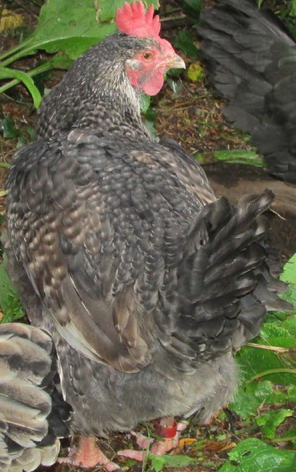

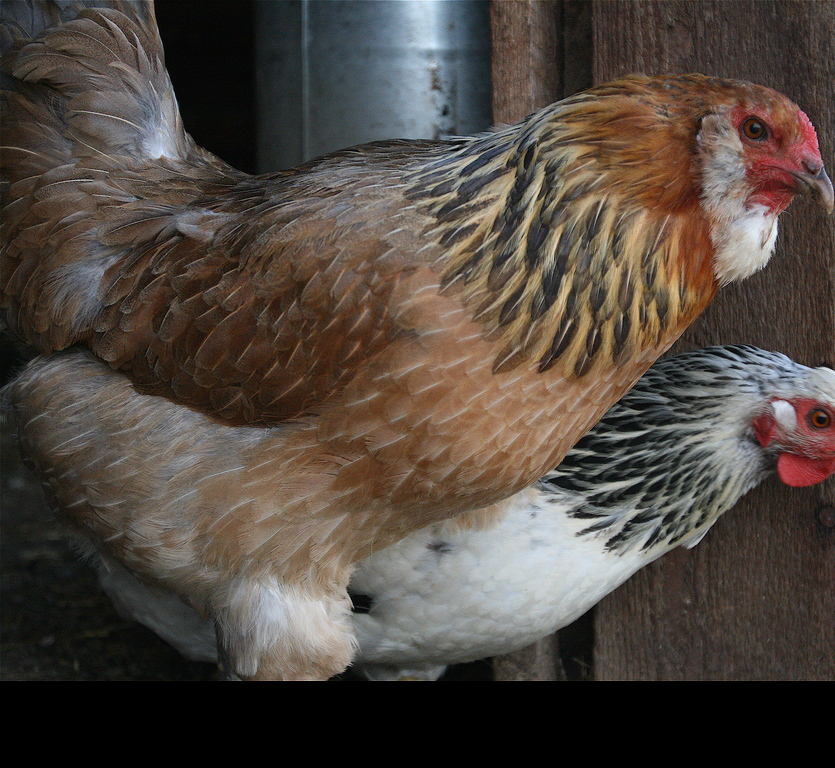

In [71]:
subimage=[] ## Creating an empty list to store the sumimage data
for i in friendly_chicken.index:
    x=cropped(friendly_chicken.data[i],friendly_chicken.XMin[i],friendly_chicken.YMin[i],friendly_chicken.XMax[i],friendly_chicken.YMax[i])
    x.save(friendly_chicken['ImageID'][i]+'_'+str(i)+".jpg")
    buffer=io.BytesIO()
    x.save(buffer,format='JPEG')
    result=buffer.getvalue()
    subimage.append(bytearray(result)) ## Storing the byte array result in a list to add it to DataFrame

## Adding a new column calles User_ID to the Dataframe

In [72]:
friendly_chicken["User_ID"]='swapanc1' 

In [73]:
friendly_chicken.head(4)

ImageID Source_x LabelName_x  Confidence_x       XMin    XMax  \
0  000411001ff7dd4f   xclick    /m/09b5t           1.0  460.80000   702.4   
1  0650a130d7f707b5   xclick    /m/09b5t           1.0   22.40000   284.8   
2  83be44c1f66a028b   xclick    /m/09b5t           1.0  418.35989  1024.0   
3  3c8c937a6b672c5f   xclick    /m/09b5t           1.0  353.60000   649.6   

         YMin        YMax IsOccluded IsTruncated    ...    IsInside  \
0  199.999995  423.999974          0           0    ...           0   
1  155.199997  630.399974          0           0    ...           0   
2   50.973450  742.513275          1           0    ...           0   
3  163.200000  635.200013          0           0    ...           0   

  LabelName_y      Source_y Confidence_y Description                id  \
0    /m/09b5t  verification            1     Chicken  000411001ff7dd4f   
1    /m/09b5t  verification            1     Chicken  0650a130d7f707b5   
2    /m/09b5t  verification            1     Chicken  83be44c1f66a028b   
3    /m/09b5t  verification            1     Chicken  3c8c937a6b672c5f   

       subset format                                               data  \
0  VALIDATION    JPG  [255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0,...   
1  VALIDATION    JPG  [255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0,...   
2  VALIDATION    JPG  [255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0,...   
3  VALIDATION    JPG  [255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0,...   

    User_ID  
0  swapanc1  
1  swapanc1  
2  swapanc1  
3  swapanc1  

[4 rows x 22 columns]

## Appending the subimage data to the DataFrame

In [74]:
friendly_chicken["Subimage_ID"]=subimage 

In [75]:
friendly_chicken.drop(columns=['LabelName_y','Source_y','Confidence_y','Source_x','Confidence_x','IsOccluded','IsTruncated','IsGroupOf','IsDepiction','IsInside','id','subset','format','data'],axis=1,inplace=True)

In [76]:
friendly_chicken.head(2)

ImageID LabelName_x   XMin   XMax        YMin        YMax  \
0  000411001ff7dd4f    /m/09b5t  460.8  702.4  199.999995  423.999974   
1  0650a130d7f707b5    /m/09b5t   22.4  284.8  155.199997  630.399974   

  Description   User_ID                                        Subimage_ID  
0     Chicken  swapanc1  [255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0,...  
1     Chicken  swapanc1  [255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0,...

## Convert the Pandas DataFrame to Spark DataFrame to write the avro file

In [77]:
final_output=spark.createDataFrame(friendly_chicken)

In [78]:
final_output.schema

StructType(List(StructField(ImageID,StringType,true),StructField(LabelName_x,StringType,true),StructField(XMin,DoubleType,true),StructField(XMax,DoubleType,true),StructField(YMin,DoubleType,true),StructField(YMax,DoubleType,true),StructField(Description,StringType,true),StructField(User_ID,StringType,true),StructField(Subimage_ID,BinaryType,true)))

In [80]:
from pyspark.sql.types import StringType
final_output = final_output.withColumn("Subimage_ID", final_output['Subimage_ID'].cast(StringType()))

## Creating a new directory

In [81]:
!hdfs dfs -mkdir /user/swapanc1/homework3/homework3_images 

mkdir: `/user/swapanc1/homework3/homework3_images': File exists


## Adding the downloaded images to HDFS Directory

In [87]:
hdfs.ls('/user/swapanc1/homework3/') 

['/user/swapanc1/homework3/homework3_images',
 '/user/swapanc1/homework3/homework3_part1.avro',
 '/user/swapanc1/homework3/homework3_part2.avro']

In [83]:
!hadoop fs -copyFromLocal '000411001ff7dd4f_0.jpg' '/user/swapanc1/homework3/homework3_images'
!hadoop fs -copyFromLocal '0650a130d7f707b5_1.jpg' '/user/swapanc1/homework3/homework3_images'
!hadoop fs -copyFromLocal '83be44c1f66a028b_2.jpg' '/user/swapanc1/homework3/homework3_images'
!hadoop fs -copyFromLocal '3c8c937a6b672c5f_3.jpg' '/user/swapanc1/homework3/homework3_images'
!hadoop fs -copyFromLocal '6b7db5139f6ef182_4.jpg' '/user/swapanc1/homework3/homework3_images'

copyFromLocal: `/user/swapanc1/homework3/homework3_images/000411001ff7dd4f_0.jpg': File exists
copyFromLocal: `/user/swapanc1/homework3/homework3_images/0650a130d7f707b5_1.jpg': File exists
copyFromLocal: `/user/swapanc1/homework3/homework3_images/83be44c1f66a028b_2.jpg': File exists
copyFromLocal: `/user/swapanc1/homework3/homework3_images/3c8c937a6b672c5f_3.jpg': File exists
copyFromLocal: `/user/swapanc1/homework3/homework3_images/6b7db5139f6ef182_4.jpg': File exists


In [84]:
hdfs.ls('/user/swapanc1/homework3/')

['/user/swapanc1/homework3/homework3_images',
 '/user/swapanc1/homework3/homework3_part1.avro']

## Saving the dataframe to hdfs directory in avro format

In [85]:
final_output.write.format("avro").save("/user/swapanc1/homework3/homework3_part2.avro")

In [86]:
hdfs.ls('/user/swapanc1/homework3/')

['/user/swapanc1/homework3/homework3_images',
 '/user/swapanc1/homework3/homework3_part1.avro',
 '/user/swapanc1/homework3/homework3_part2.avro']